# Лабораторная работа 3.3

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [86]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
df_cleaned = df.dropna()


non_numeric_cols = df_cleaned.select_dtypes(include=['object']).columns
cols_to_drop = [col for col in non_numeric_cols if col not in ['Sex', 'Embarked']]
df_cleaned = df_cleaned.drop(columns=cols_to_drop)


df_cleaned['Sex'] = df_cleaned['Sex'].map({'male': 0, 'female': 1})
embarked_mapping = {'S': 1, 'C': 2, 'Q': 3}
df_cleaned['Embarked'] = df_cleaned['Embarked'].map(embarked_mapping)

if 'PassengerId' in df_cleaned.columns:
    df_cleaned = df_cleaned.drop(columns=['PassengerId'])

In [88]:
df_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,1,38.0,1,0,71.2833,2
3,1,1,1,35.0,1,0,53.1000,1
6,0,1,0,54.0,0,0,51.8625,1
10,1,3,1,4.0,1,1,16.7000,1
11,1,1,1,58.0,0,0,26.5500,1


Разделение данных

In [89]:
X = df_cleaned.drop(columns=['Survived'])
y = df_cleaned['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Обучение логистической регрессии

In [90]:
clf = LogisticRegression(random_state=0, max_iter=1000)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Точность модели:", accuracy_score(y_test, y_pred))

Точность модели: 0.8108108108108109


### Влияние Embarked

Удалим Embarked и проверим точность

In [91]:
X_no_embarked = X.drop(columns=['Embarked'])
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_no_embarked, y, test_size=0.2, random_state=42)

clf2 = LogisticRegression(random_state=0, max_iter=1000)
clf2.fit(X_train2, y_train2)

y_pred2 = clf2.predict(X_test2)
print("Точность модели без Embarked:", accuracy_score(y_test2, y_pred2))

Точность модели без Embarked: 0.7297297297297297


Точность изменилась почти на 4%, значит этот признак оказал не сильное влияние

#### Предикт

In [92]:
y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]

In [93]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Precision: 0.875
Recall: 0.84
F1: 0.8571428571428571


### Тепловая карта матрицы ошибок (Confusion Matrix)

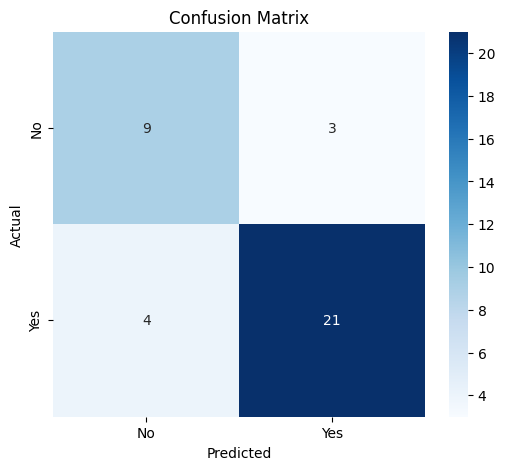

In [94]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### Кривая Precision-Recall

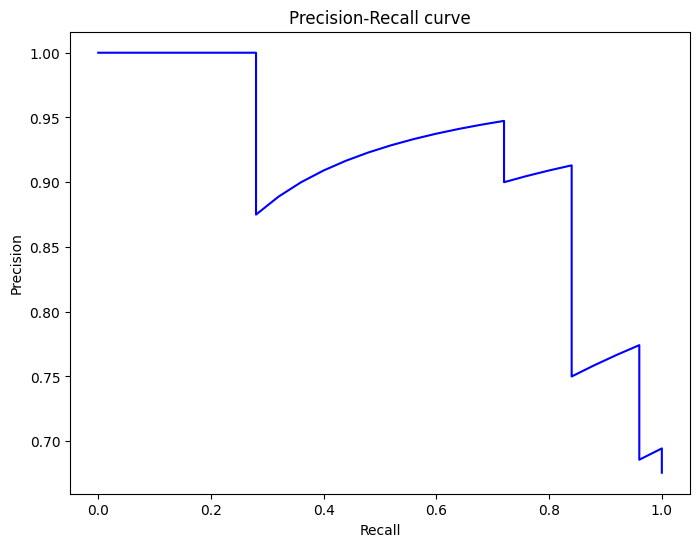

In [95]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='b', label='Кривая Precision-Recall ')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


### Кривая ROC

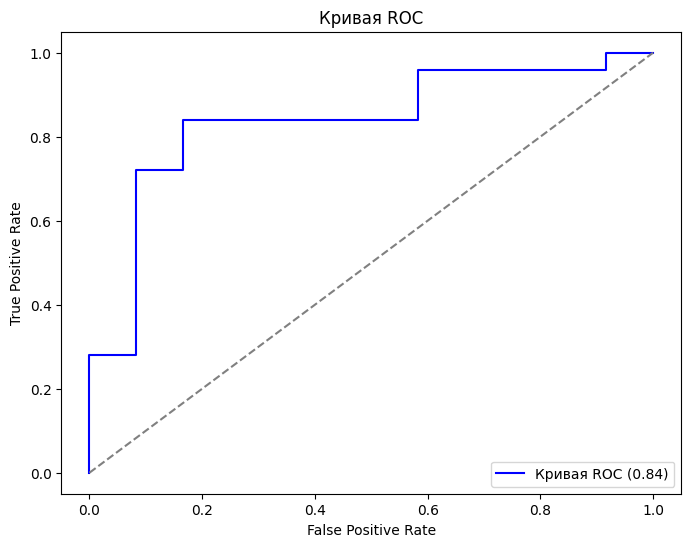

In [96]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Кривая ROC ({roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Кривая ROC')
plt.legend(loc='lower right')
plt.show()

# Метод опорных векторов

Обучаем

In [97]:
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

Предсказания

In [98]:
y_pred_svm = svm.predict(X_test)
y_pred_prob_svm = svm.predict_proba(X_test)[:, 1]

In [99]:
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Precision: 0.6756756756756757
Recall: 1.0
F1: 0.8064516129032258


### Тепловая карта матрицы ошибок (Confusion Matrix)

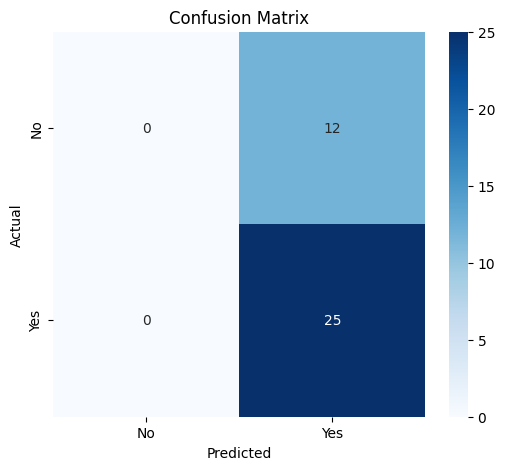

In [100]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


### Кривая Precision-Recall

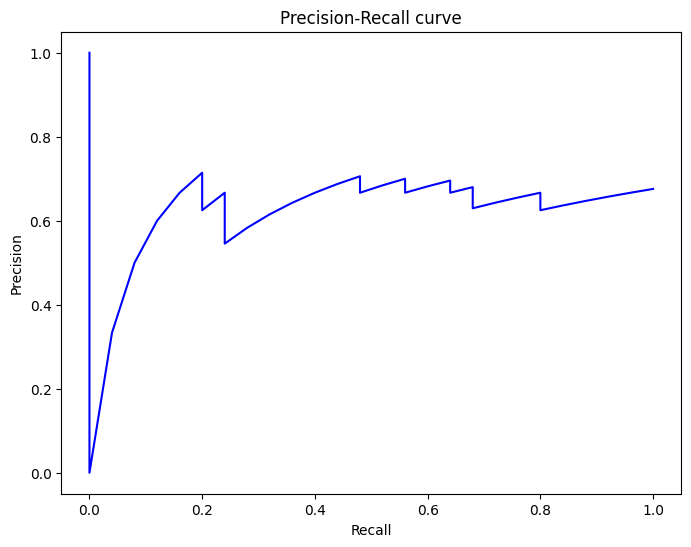

In [101]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='b', label='Кривая Precision-Recall ')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

### Кривая ROC

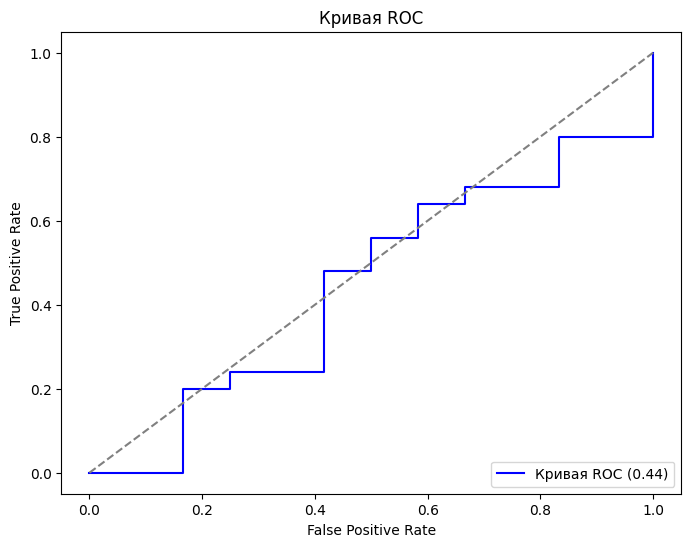

In [102]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Кривая ROC ({roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Кривая ROC')
plt.legend(loc='lower right')
plt.show()

# Метод ближайших соседей

Обучаем

In [103]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

Предсказания

In [104]:
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]

In [105]:
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1: {f1}")

Precision: 0.6774193548387096
Recall: 0.84
F1: 0.75


### Тепловая карта матрицы ошибок (Confusion Matrix)

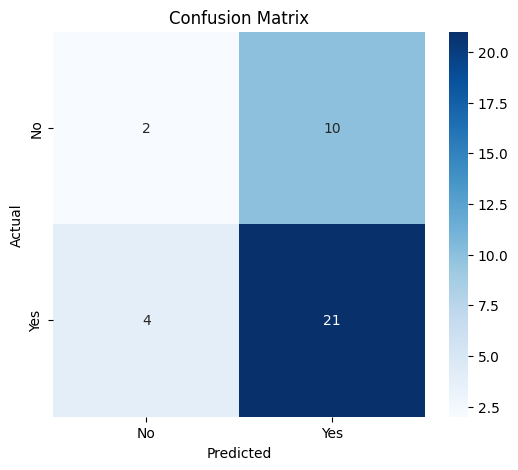

In [106]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

### Кривая Precision-Recall

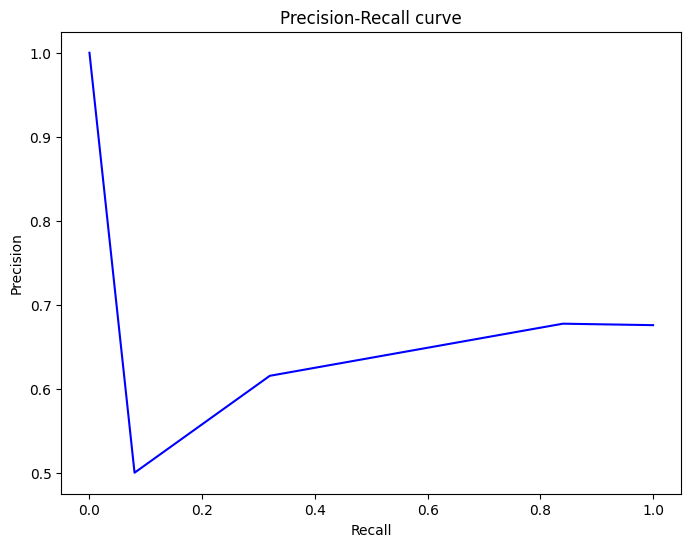

In [107]:
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred_prob_knn)

plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='b', label='Кривая Precision-Recall ')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()

### Кривая ROC

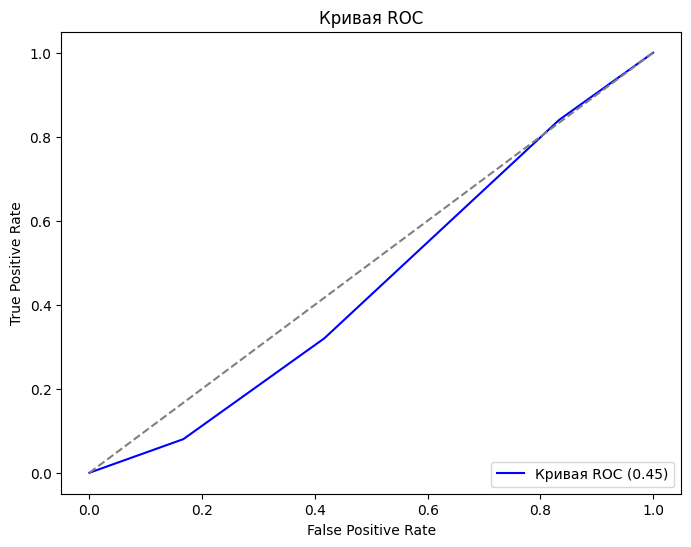

In [108]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'Кривая ROC ({roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Кривая ROC')
plt.legend(loc='lower right')
plt.show()